In [24]:
import pandas as pd
import numpy as np

In [25]:
# Use the the width of the browser
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))
pd.set_option('display.max_rows', 200)


/tmp/ipykernel_6974/2147086474.py:2: DeprecationWarning:

Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display



# Merge Results (BO vs HYB-PARSIMONY vs SKLEARN-GENETIC_OPT)

This notebook presents the results of comparing HYB-PARSIMONY with two other methods: Bayesian Optimization (BO) utilizing all features ($num\_cols$) and a classical three-step methodology based on GA for featuring selection:

- **Bayesian Optimization with all features (BO):** The column $bo\_FINAL\_SCORE\_TST$ represents the testing fitness value ($J_{tst}$) of a base model trained with all input features ($bo\_NFS==num\_cols$). Hyperparameter search with BO used 250 iterations.

- **HYB-PARSIMONY:** The columns $hyb\_NFS$ and $hyb\_FINAL\_SCORE\_TST$ correspond to the number of features (NFS) and the fitness value ($J_{tst}$) obtained with each test dataset using HYB-PARSIMONY. HYB-PARSIMONY was executed with the following parameters: $\Gamma=0.50$, $nruns=250$, $time\_limit=120min$, $P=15$, $early\_{stopping}=35$. Additionally, $ReRank$ was set to $0.001$, representing the maximum allowable difference between the $J$ values of two models to be considered equal.

- **SKLEARN-GENETIC-OPT with three steps:** The three-step methodology involves the following: first, performing hyperparameter optimization of base model with BO using all features ($nruns=250$); second, employing Genetic Algorithms from the 'sklearn-genetic-opt' package for feature selection with the hyperparameters obtained in the first step and the following GA hyperparameters: $nruns=250$ and $P=15$; and finally, repeating the hyperparameter tuning with BO but using only the selected variables ($nruns=250$).The columns $ga\_NFS$ and $ga\_FINAL\_SCORE\_TST$ display the results obtained using $sklearn-genetic-opt$ with the three steps described above.

In these experiments, half of the instances from each dataset were used for training/validation, while the remaining half constituted the test dataset to assess the generalization capabilities of the models. The results represent the average values obtained from five runs of each methodology, each with different random seeds. 5-fold cross-validation was performed in all methods.

All the results are based on 100 datasets, covering binary ($44$), multiclass ($34$), and regression ($22$) problems, which were sourced from [openml.org](https://www.openml.org/) using the 'Download_Datasets.ipynb' notebook. Base ML algorithms were scikit-learn *KernelRidge* for regression datasets, and scikit-learn *LogisticRegression* for binary and multiclass datasets.

In [26]:
# Obtained with 'SKGENETICSComparative.py'
ga_mat = pd.read_csv('./results/sklearn_genetics_opt_2023_08_01_11_51_45_.csv')
# Obtained with 'HybComparative.py'
hyb_mat = pd.read_csv('./results/hybrid_alone2023_08_01_11_37_47_.csv')
# Obtained with 'BOComparative.py'
bo_mat = pd.read_csv('./results/bayesian_opt_all_feats2023_07_31_16_38_05_.csv')

In [27]:
hyb_mat.tail(1)

,optim,name_db,type_prob,score_type,run_total,time_limit,elapsed_time,num_rows,num_cols,num_classes,train_val_size,test_size,NFS,FINAL_SCORE_VAL,FINAL_SCORE_TST,name_file,model,selec_feats_thr,best_model_parameters,best_model_probsfeats
499,HYB,BachChoralHarmony,multiclass,f1_macro,4,120.0,122.941583,5665,104,102,2832,2833,90,0.468365,0.373867,BachChoralHarmony.csv,"LogisticRegression(C=17.915062412004428, max_i...","['V1_ 003006b_', 'V1_000106b_', 'V1_000206b_'...",[1.2532183254880023],[0.4011513482211091 0.5941881747136664 0.88375...


In [28]:
hyb_mat.type_prob.value_counts()//5

type_prob
binary        44
multiclass    34
regression    22
Name: count, dtype: int64

In [29]:
ga_mat.tail(1)

,optim,name_db,type_prob,score_type,run_total,time_limit,elapsed_time,num_rows,num_cols,num_classes,train_val_size,test_size,NFS,FINAL_SCORE_VAL,FINAL_SCORE_TST,name_file,model,best_feats
493,SKGENETICSOPT,BachChoralHarmony,multiclass,f1_macro,4,120.0,547.171066,5665,104,102,2832,2833,67,0.467027,0.337267,BachChoralHarmony.csv,"LogisticRegression(C=15.844828041760172, max_i...","Index(['V1_ 002908ch', 'V1_000306b_', 'V1_0..."


In [30]:
bo_mat.tail(1)

,optim,name_db,type_prob,score_type,run_total,time_limit,elapsed_time,num_rows,num_cols,num_classes,train_val_size,test_size,NFS,FINAL_SCORE_VAL,FINAL_SCORE_TST,name_file,model
493,BO,BachChoralHarmony,multiclass,f1_macro,4,120.0,93.562942,5665,104,102,2832,2833,104,0.465363,0.409244,BachChoralHarmony.csv,"LogisticRegression(C=18.638050934611805, max_i..."


In [31]:
bo_mat_mean = bo_mat[['name_file', 'elapsed_time', 'num_rows', 'num_cols', 'num_classes',
       'train_val_size', 'test_size', 'NFS', 'FINAL_SCORE_VAL',
       'FINAL_SCORE_TST']].groupby('name_file').mean().reset_index()

hyb_mat_mean = hyb_mat[['name_file', 'elapsed_time', 'num_rows', 'num_cols', 'num_classes',
       'train_val_size', 'test_size', 'NFS', 'FINAL_SCORE_VAL',
       'FINAL_SCORE_TST']].groupby('name_file').mean().reset_index()

ga_mat_mean = ga_mat[['name_file', 'elapsed_time', 'num_rows', 'num_cols', 'num_classes',
       'train_val_size', 'test_size', 'NFS', 'FINAL_SCORE_VAL',
       'FINAL_SCORE_TST']].groupby('name_file').mean().reset_index()

In [32]:
names_inter = np.intersect1d(bo_mat_mean.name_file, hyb_mat_mean.name_file)
names_inter = np.intersect1d(names_inter, ga_mat_mean.name_file)
names_inter

array(['Ailerons.csv', 'BachChoralHarmony.csv', 'COIL2000.csv',
       'Contaminant.csv', 'CreditCardSubset.csv', 'ECG5000.csv',
       'FICO.csv', 'GesturePhaseSegmentationProcessed.csv',
       'IEEE80211aa.csv', 'Indian.csv', 'Insurance.csv',
       'Intersectional.csv', 'JapaneseVowels.csv', 'Job.csv',
       'Kaggle.csv', 'Long.csv', 'MagicTelescope.csv',
       'MiamiHousing2016.csv', 'PhishingWebsites.csv', 'SAT11.csv',
       'Satellite.csv', 'Titanic.csv', 'USPS.csv', 'VulNoneVul.csv',
       'ada.csv', 'ailerons.csv', 'allbp.csv', 'ames.csv', 'autoUniv.csv',
       'avocado.csv', 'bank32nh.csv', 'cardiotocography.csv', 'churn.csv',
       'cjs.csv', 'clean2.csv', 'coil2000.csv', 'compas.csv', 'cpu.csv',
       'credit.csv', 'dataset.csv', 'default.csv', 'dis.csv', 'dna.csv',
       'eeg.csv', 'elevators.csv', 'eye.csv', 'fifa.csv', 'first.csv',
       'gas.csv', 'grid.csv', 'health.csv', 'heloc.csv', 'house.csv',
       'hypothyroid.csv', 'jasmine.csv', 'jm1.csv', 'jungle.csv

In [33]:
bo_mat_mean_selec = bo_mat_mean[bo_mat_mean.name_file.isin(names_inter)]
hyb_mat_mean_selec = hyb_mat_mean[hyb_mat_mean.name_file.isin(names_inter)]
ga_mat_mean_selec = ga_mat_mean[ga_mat_mean.name_file.isin(names_inter)]

In [34]:
bo_mat_mean_selec.columns = ['bo_'+i for i in bo_mat_mean_selec.columns]
hyb_mat_mean_selec.columns = ['hyb_'+i for i in hyb_mat_mean_selec.columns]
ga_mat_mean_selec.columns = ['ga_'+i for i in ga_mat_mean_selec.columns]


In [35]:
bo_mat_mean_selec.columns.values[0] = 'name_file'
hyb_mat_mean_selec.columns.values[0] = 'name_file'
ga_mat_mean_selec.columns.values[0] = 'name_file'

In [36]:
mat_merge = pd.merge(pd.merge(bo_mat_mean_selec, hyb_mat_mean_selec, on='name_file'),ga_mat_mean_selec, on='name_file')

In [37]:
mat_merge.columns

Index(['name_file', 'bo_elapsed_time', 'bo_num_rows', 'bo_num_cols',
       'bo_num_classes', 'bo_train_val_size', 'bo_test_size', 'bo_NFS',
       'bo_FINAL_SCORE_VAL', 'bo_FINAL_SCORE_TST', 'hyb_elapsed_time',
       'hyb_num_rows', 'hyb_num_cols', 'hyb_num_classes', 'hyb_train_val_size',
       'hyb_test_size', 'hyb_NFS', 'hyb_FINAL_SCORE_VAL',
       'hyb_FINAL_SCORE_TST', 'ga_elapsed_time', 'ga_num_rows', 'ga_num_cols',
       'ga_num_classes', 'ga_train_val_size', 'ga_test_size', 'ga_NFS',
       'ga_FINAL_SCORE_VAL', 'ga_FINAL_SCORE_TST'],
      dtype='object')

In [38]:
mat_merge = pd.merge(mat_merge, bo_mat[[ 'name_db', 'type_prob', 'score_type', 'num_rows', 'num_cols', 'num_classes',
       'train_val_size', 'test_size', 'name_file']].drop_duplicates(), on='name_file', how='left')

In [39]:
mat_gt100cols = mat_merge.query('num_cols>100')[['name_db', 'train_val_size', 'score_type', 'bo_NFS', 'hyb_NFS', 'ga_NFS', 'bo_FINAL_SCORE_TST','hyb_FINAL_SCORE_TST','ga_FINAL_SCORE_TST']].sort_values('bo_NFS', ascending=False)
mat_gt100cols

,name_db,train_val_size,score_type,bo_NFS,hyb_NFS,ga_NFS,bo_FINAL_SCORE_TST,hyb_FINAL_SCORE_TST,ga_FINAL_SCORE_TST
42,dna,1593,f1_macro,360.0,156.2,181.4,0.941958,0.944403,0.943414
27,ames_housing,1465,MSE/RMSE,354.0,178.8,187.0,0.441985,0.520473,0.525417
75,philippine,2916,logloss,308.0,62.6,151.6,0.556639,0.542137,0.551931
80,scene,1203,logloss,304.0,49.2,142.6,0.200099,0.060756,0.107927
85,splice,1595,f1_macro,287.0,146.6,157.4,0.941357,0.943285,0.932967
54,jasmine,1492,logloss,280.0,71.4,141.0,0.444726,0.447615,0.446151
91,topo_2_1,4442,MSE/RMSE,266.0,68.8,138.6,0.924924,0.924205,0.923439
63,madeline,1570,logloss,259.0,54.0,126.8,0.670282,0.680337,0.672189
22,USPS,4649,f1_macro,256.0,135.8,136.6,0.939930,0.938260,0.937496
99,yprop_4_1,4442,MSE/RMSE,251.0,84.6,121.4,0.915840,0.924978,0.918469


In [40]:
mat_gt100cols.to_csv('mat_gt100cols.csv', index=False)

# Results with Binary Datasets (LogLoss)

In [41]:
mat_merge_reduc = mat_merge[['name_file', 'name_db', 'score_type', 'num_rows', 'num_cols', 'num_classes',
       'train_val_size', 'test_size', 'bo_NFS', 'bo_FINAL_SCORE_TST', 
           'hyb_NFS', 'hyb_FINAL_SCORE_TST', 
           'ga_NFS', 'ga_FINAL_SCORE_TST']].sort_values('bo_NFS', ascending=False)
mat_merge_reduc.query('score_type=="logloss"')

,name_file,name_db,score_type,num_rows,num_cols,num_classes,train_val_size,test_size,bo_NFS,bo_FINAL_SCORE_TST,hyb_NFS,hyb_FINAL_SCORE_TST,ga_NFS,ga_FINAL_SCORE_TST
75,philippine.csv,philippine,logloss,5832,308,2,2916,2916,308.0,0.556639,62.6,0.542137,151.60,0.551931
80,scene.csv,scene,logloss,2407,304,2,1203,1204,304.0,0.200099,49.2,0.060756,142.60,0.107927
54,jasmine.csv,jasmine,logloss,2984,280,2,1492,1492,280.0,0.444726,71.4,0.447615,141.00,0.446151
63,madeline.csv,madeline,logloss,3140,259,2,1570,1570,259.0,0.670282,54.0,0.680337,126.80,0.672189
34,clean2.csv,clean2,logloss,6598,168,2,3299,3299,168.0,0.000009,36.0,0.000007,73.80,0.000009
2,COIL2000.csv,COIL2000-train,logloss,5822,150,2,2911,2911,150.0,0.210128,35.6,0.212552,77.20,0.211421
5,ECG5000.csv,ECG5000,logloss,4998,140,2,2499,2499,140.0,0.044005,29.4,0.049573,68.60,0.044114
98,yeast.csv,yeast_ml8,logloss,2417,129,2,1208,1209,129.0,0.066597,38.0,0.113988,66.50,0.071769
68,mushroom.csv,mushroom,logloss,8124,125,2,4062,4062,125.0,0.000039,59.4,0.000053,70.40,0.000039
87,sylva.csv,sylva_prior,logloss,14395,108,2,7197,7198,108.0,0.017647,55.8,0.019883,61.20,0.019447


In [42]:
import matplotlib.pyplot as plt
import plotly.express as px
mat_merge_melt = mat_merge.query('score_type=="logloss"').sort_values('bo_NFS', ascending=False).melt(id_vars=['name_file'], value_vars=['bo_NFS', 'ga_NFS', 'hyb_NFS'])
mat_merge_melt['id_ds'] = mat_merge_melt['name_file'].map(dict(zip(mat_merge_melt['name_file'].unique(), ['V'+str(i) for i in range(len(mat_merge_melt['name_file'].unique()))])))
mat_merge_melt.head()

fig = px.line_polar(mat_merge_melt, r = 'value', theta = 'id_ds', 
#                     line_close = True,
                    color = 'variable', color_discrete_map = {'A': 'dodgerblue', 'B': 'gold', 'C': 'green'},
                    title='Number of Features Selected (NFS) in Binary Classification Problems',
#                    line_dash='variable'
                   )
# fig.update_traces(fill = 'toself')
fig.update_layout(width=800, height=800)
fig.show() 


mat_merge_melt = mat_merge.query('score_type=="logloss"').sort_values('bo_NFS', ascending=False).melt(id_vars=['name_file'], value_vars=['bo_FINAL_SCORE_TST', 'ga_FINAL_SCORE_TST', 'hyb_FINAL_SCORE_TST'])
mat_merge_melt['id_ds'] = mat_merge_melt['name_file'].map(dict(zip(mat_merge_melt['name_file'].unique(), ['V'+str(i) for i in range(len(mat_merge_melt['name_file'].unique()))])))
mat_merge_melt.head()

fig = px.line_polar(mat_merge_melt, r = 'value', theta = 'id_ds', 
#                     line_close = True,
                    color = 'variable', 
                    color_discrete_map = {'A': 'dodgerblue', 'B': 'gold', 'C': 'green'},
                    title='Logloss in Binary Classification Problems (smaller better)',
                    
#                     line_dash='variable'
                   )
# fig.update_traces(fill = 'toself')
fig.update_layout(width=800, height=800)
fig.show() 


# Results with Regression Datasets (RMSE in Test)

In [43]:
mat_merge_reduc = mat_merge[['name_file', 'name_db', 'score_type', 'num_rows', 'num_cols', 'num_classes',
       'train_val_size', 'test_size', 'bo_NFS', 'bo_FINAL_SCORE_TST', 
           'hyb_NFS', 'hyb_FINAL_SCORE_TST', 
           'ga_NFS', 'ga_FINAL_SCORE_TST']].sort_values('bo_NFS', ascending=False)
mat_merge_reduc.query('score_type=="MSE/RMSE"')

,name_file,name_db,score_type,num_rows,num_cols,num_classes,train_val_size,test_size,bo_NFS,bo_FINAL_SCORE_TST,hyb_NFS,hyb_FINAL_SCORE_TST,ga_NFS,ga_FINAL_SCORE_TST
27,ames.csv,ames_housing,MSE/RMSE,2930,354,1032,1465,1465,354.0,0.441985,178.8,0.520473,187.0,0.525417
91,topo.csv,topo_2_1,MSE/RMSE,8885,266,1336,4442,4443,266.0,0.924924,68.8,0.924205,138.6,0.923439
99,yprop.csv,yprop_4_1,MSE/RMSE,8885,251,1336,4442,4443,251.0,0.915840,84.6,0.924978,121.4,0.918469
67,mtp.csv,mtp,MSE/RMSE,4450,202,800,2225,2225,202.0,0.694320,70.2,0.688403,110.4,0.686934
58,kings.csv,kings_county,MSE/RMSE,21613,132,4028,10806,10807,132.0,0.356660,97.0,0.374112,79.8,0.370150
19,SAT11.csv,SAT11-HAND-runtime-regression,MSE/RMSE,4440,130,1945,2220,2220,130.0,0.517730,48.4,0.514349,77.0,0.510731
86,superconduct.csv,superconduct,MSE/RMSE,21263,81,3007,10631,10632,81.0,0.342878,42.8,0.343731,57.0,0.341291
29,avocado.csv,avocado_sales,MSE/RMSE,18249,67,259,9124,9125,67.0,0.386954,55.2,0.369856,48.8,0.397194
14,Kaggle.csv,Kaggle_bike_sharing_demand_challange,MSE/RMSE,10886,47,822,5443,5443,47.0,0.387462,39.8,0.395841,37.4,0.398907
0,Ailerons.csv,Ailerons,MSE/RMSE,13750,40,35,6875,6875,40.0,0.394334,12.0,0.389376,25.6,0.393468


In [44]:
mat_merge_melt = mat_merge.query('score_type=="MSE/RMSE"').sort_values('bo_NFS', ascending=False).melt(id_vars=['name_file'], value_vars=['bo_NFS', 'ga_NFS', 'hyb_NFS'])
mat_merge_melt['id_ds'] = mat_merge_melt['name_file'].map(dict(zip(mat_merge_melt['name_file'].unique(), ['V'+str(i) for i in range(len(mat_merge_melt['name_file'].unique()))])))
mat_merge_melt.head()

fig = px.line_polar(mat_merge_melt, r = 'value', theta = 'id_ds', 
#                     line_close = True,
                    color = 'variable', color_discrete_map = {'A': 'dodgerblue', 'B': 'gold', 'C': 'green'},
                     title='Number of Features Selected (NFS) in Regression Problems',
#                    line_dash='variable'
                   )
# fig.update_traces(fill = 'toself')
fig.update_layout(width=800, height=800)
fig.show() 

mat_merge_melt = mat_merge.query('score_type=="MSE/RMSE"').sort_values('bo_NFS', ascending=False).melt(id_vars=['name_file'], value_vars=['bo_FINAL_SCORE_TST', 'ga_FINAL_SCORE_TST', 'hyb_FINAL_SCORE_TST'])
mat_merge_melt['id_ds'] = mat_merge_melt['name_file'].map(dict(zip(mat_merge_melt['name_file'].unique(), ['V'+str(i) for i in range(len(mat_merge_melt['name_file'].unique()))])))
mat_merge_melt.head()

fig = px.line_polar(mat_merge_melt, r = 'value', theta = 'id_ds', 
#                     line_close = True,
                    color = 'variable', color_discrete_map = {'A': 'dodgerblue', 'B': 'gold', 'C': 'green'},
                     title='RMSE in Regression Problems (smaller better)',
#                    line_dash='variable'
                   )
fig.update_layout(width=800, height=800)
fig.show() 


# Results with MultiClass Datasets (F1Macro)

In [45]:
mat_merge_reduc = mat_merge[['name_file', 'name_db', 'score_type', 'num_rows', 'num_cols', 'num_classes',
       'train_val_size', 'test_size', 'bo_NFS', 'bo_FINAL_SCORE_TST', 
           'hyb_NFS', 'hyb_FINAL_SCORE_TST', 
           'ga_NFS', 'ga_FINAL_SCORE_TST']].sort_values('bo_NFS', ascending=False)
mat_merge_reduc.query('score_type=="f1_macro"')

,name_file,name_db,score_type,num_rows,num_cols,num_classes,train_val_size,test_size,bo_NFS,bo_FINAL_SCORE_TST,hyb_NFS,hyb_FINAL_SCORE_TST,ga_NFS,ga_FINAL_SCORE_TST
42,dna.csv,dna,f1_macro,3186,360,3,1593,1593,360.0,0.941958,156.2,0.944403,181.4,0.943414
85,splice.csv,splice,f1_macro,3190,287,3,1595,1595,287.0,0.941357,146.6,0.943285,157.4,0.932967
22,USPS.csv,USPS,f1_macro,9298,256,10,4649,4649,256.0,0.939930,135.8,0.938260,136.6,0.937496
28,autoUniv.csv,autoUniv-au4-2500,f1_macro,2500,226,3,1250,1250,226.0,0.397151,93.0,0.401714,109.8,0.397066
9,Indian.csv,Indian_pines,f1_macro,9144,220,8,4572,4572,220.0,0.837844,105.2,0.832469,108.4,0.826121
48,gas.csv,gas-drift,f1_macro,13910,128,6,6955,6955,128.0,0.988435,56.8,0.988515,67.4,0.988832
1,BachChoralHarmony.csv,BachChoralHarmony,f1_macro,5665,104,102,2832,2833,104.0,0.404796,81.4,0.387750,61.8,0.370661
33,cjs.csv,cjs,f1_macro,2796,99,6,1398,1398,99.0,0.996998,31.8,0.998292,44.8,0.997249
56,jungle.csv,jungle_chess_2pcs_endgame_panther_lion,f1_macro,4704,75,3,2352,2352,75.0,0.963891,43.0,0.965465,39.8,0.967923
71,optdigits.csv,optdigits,f1_macro,5620,64,10,2810,2810,64.0,0.971251,48.8,0.969996,43.6,0.964035


In [46]:
mat_merge_melt = mat_merge.query('score_type=="f1_macro"').sort_values('bo_NFS', ascending=False).melt(id_vars=['name_file'], value_vars=['bo_NFS', 'ga_NFS', 'hyb_NFS'])
mat_merge_melt['id_ds'] = mat_merge_melt['name_file'].map(dict(zip(mat_merge_melt['name_file'].unique(), ['V'+str(i) for i in range(len(mat_merge_melt['name_file'].unique()))])))
#display(mat_merge_melt)

fig = px.line_polar(mat_merge_melt, r = 'value', theta = 'id_ds', 
#                     line_close = True,
                    color = 'variable', color_discrete_map = {'A': 'dodgerblue', 'B': 'gold', 'C': 'green'},
                     title='Number of Features Selected (NFS) in Multiclass Problems',
#                    line_dash='variable'
                   )
# fig.update_traces(fill = 'toself')
fig.update_layout(width=800, height=800)
fig.show() 

mat_merge_melt = mat_merge.query('score_type=="f1_macro"').sort_values('bo_NFS', ascending=False).melt(id_vars=['name_file'], value_vars=['bo_FINAL_SCORE_TST', 'ga_FINAL_SCORE_TST', 'hyb_FINAL_SCORE_TST'])
mat_merge_melt['id_ds'] = mat_merge_melt['name_file'].map(dict(zip(mat_merge_melt['name_file'].unique(), ['V'+str(i) for i in range(len(mat_merge_melt['name_file'].unique()))])))
mat_merge_melt.head()

fig = px.line_polar(mat_merge_melt, r = 'value', theta = 'id_ds', 
#                     line_close = True,
                    color = 'variable', color_discrete_map = {'A': 'dodgerblue', 'B': 'gold', 'C': 'green'},
                     title='F1_macro in Multiclass Problems (bigger better)',
#                    line_dash='variable'
                   )
fig.update_layout(width=800, height=800)
fig.show() 


# Save Results

In [47]:
mat_merge.to_csv('mat_merge_18sep23.csv', index=False)

In [48]:
mat_merge.score_type.value_counts()

score_type
logloss     44
f1_macro    34
MSE/RMSE    22
Name: count, dtype: int64

In [49]:
elapsed_times = mat_merge[['score_type','num_rows', 'num_cols', 'num_classes','train_val_size',
                           'bo_elapsed_time','hyb_elapsed_time','ga_elapsed_time']].sort_values('ga_elapsed_time', ascending=False).reset_index()
elapsed_times

,index,score_type,num_rows,num_cols,num_classes,train_val_size,bo_elapsed_time,hyb_elapsed_time,ga_elapsed_time
0,9,f1_macro,9144,220,8,4572,78.115690,123.565510,1034.558482
1,50,f1_macro,22272,25,75,11136,155.239546,128.728807,946.720026
2,52,MSE/RMSE,22784,16,2045,11392,96.925234,123.040076,889.791384
3,58,MSE/RMSE,21613,132,4028,10806,85.480952,121.913883,815.425957
4,86,MSE/RMSE,21263,81,3007,10631,82.716661,122.149053,782.301350
5,37,f1_macro,8192,21,56,4096,157.998138,130.161974,772.118044
6,29,MSE/RMSE,18249,67,259,9124,59.064614,121.656104,567.933510
7,46,MSE/RMSE,18063,5,133,9031,57.134452,122.056435,538.471373
8,1,f1_macro,5665,104,102,2832,87.739363,124.397921,491.640654
9,44,MSE/RMSE,16599,18,61,8299,47.285192,121.440348,454.307166


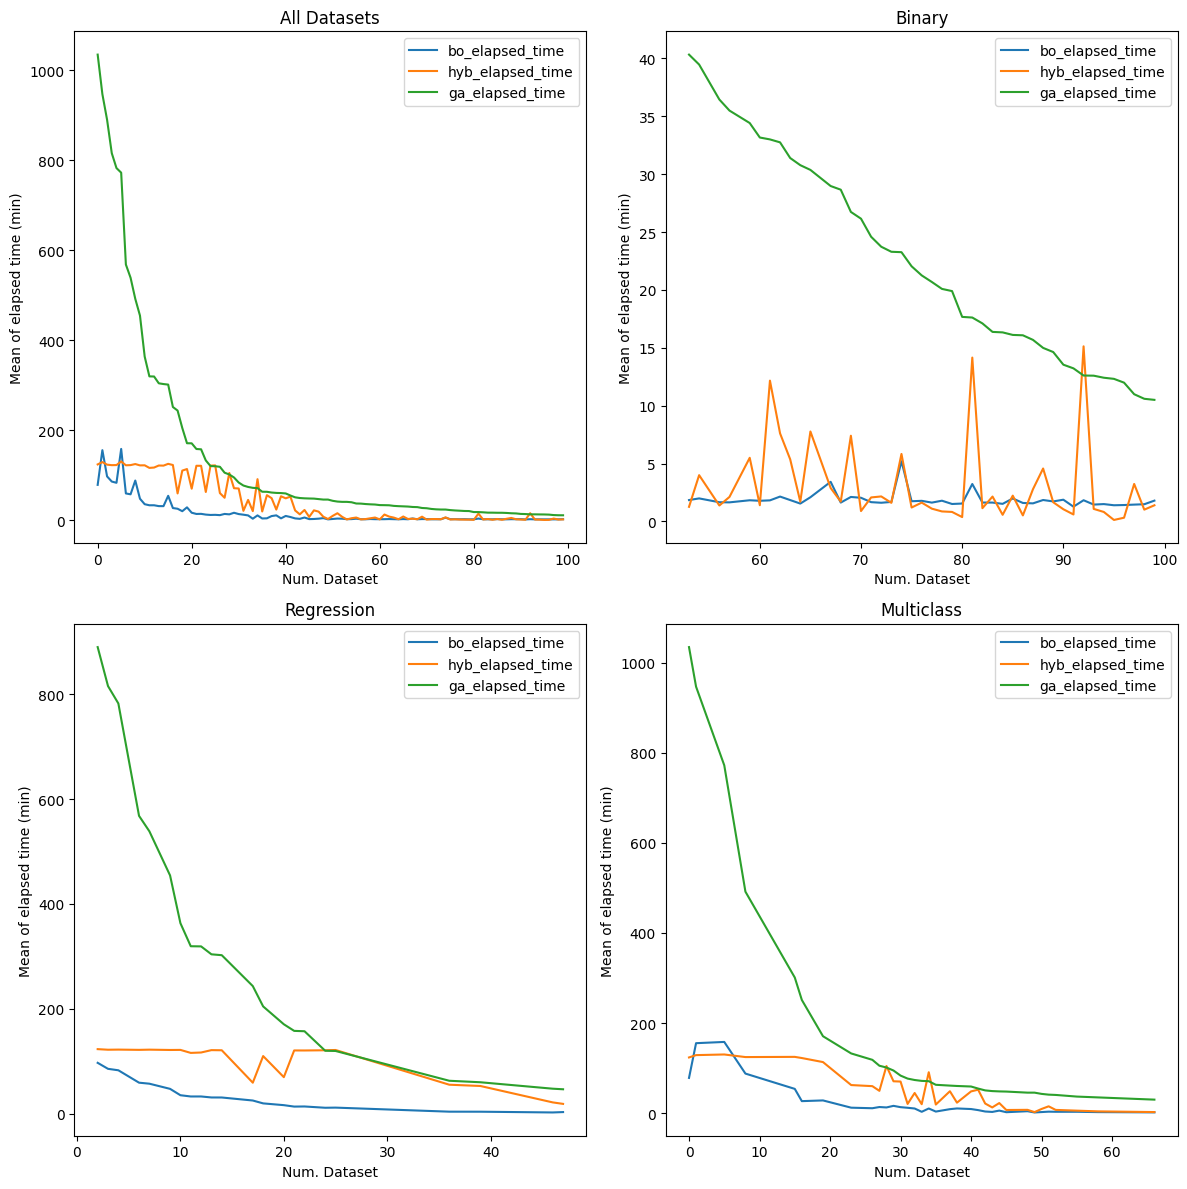

In [50]:
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
elapsed_times[['bo_elapsed_time','hyb_elapsed_time','ga_elapsed_time']].plot(ylabel='Mean of elapsed time (min)', xlabel='Num. Dataset', title='All Datasets', ax=axs[0,0])
elapsed_times.query("score_type=='logloss'")[['bo_elapsed_time','hyb_elapsed_time','ga_elapsed_time']].plot(ylabel='Mean of elapsed time (min)', xlabel='Num. Dataset', title='Binary', ax=axs[0,1])
elapsed_times.query("score_type=='MSE/RMSE'")[['bo_elapsed_time','hyb_elapsed_time','ga_elapsed_time']].plot(ylabel='Mean of elapsed time (min)', xlabel='Num. Dataset', title='Regression', ax=axs[1,0])
elapsed_times.query("score_type=='f1_macro'")[['bo_elapsed_time','hyb_elapsed_time','ga_elapsed_time']].plot(ylabel='Mean of elapsed time (min)', xlabel='Num. Dataset', title='Multiclass', ax=axs[1,1])
plt.tight_layout()
plt.savefig('Elapsed_times.png')
plt.show()
